In [2]:
import pandas as pd

# 1.1 Call libraries for image processing
#     Another preprocessing option is text and sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1.2, Libraries for building sequential CNN model
#      A model is composed of sequence of layered objects
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input

# 1.5 OS related
import os

# 1.6 For ROC plotting
import matplotlib.pyplot as plt

# 1.7
import numpy as np
# conda install scikit-learn
from sklearn import metrics
import time

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
img_width, img_height = 250, 250


train_data_dir = 'D:/chest_xray/train'
test_data_dir =  'D:/chest_xray/test'

nb_train_samples = 5216   # Actual: 1341 Normal + 3875 Pneumonia(more) =    5216

validation_data_dir = 'D:/chest_xray/val'

nb_validation_samples = 16   # Actual: 8 + 8 =  16 

batch_size = 32             # No of batches = 5216/32 = 163
                            # So per epoch we have 163 batches

epochs = 1

test_generator_samples = 300

test_batch_size = 16

input_shape = (img_width, img_height, 3)

In [5]:
model = Sequential()

In [6]:
model.add(Input(shape = (img_width, img_height,3)))

In [7]:
model.add(Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'))

In [8]:
model.add(MaxPool2D())

In [9]:
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

In [10]:
model.add(Flatten())

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 125, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)            0         
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(Dense(256,activation='relu'))

In [13]:
model.add(Dropout(rate=0.25))

In [14]:
model.add(Dense(32,activation='relu'))

In [15]:
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 125, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)            0         
                                                                 
 dense (Dense)               (None, 256)               58982656  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
tr_dtgen = ImageDataGenerator(
                              rescale=1. / 255, 
                              shear_range=0.25,
                              zoom_range=0.25,
                              horizontal_flip=True,
                              )

In [19]:
train_generator = tr_dtgen.flow_from_directory(
                                               train_data_dir,
                                               target_size=(img_width, img_height),
                                               batch_size=batch_size,  
                                               class_mode='binary' 

                                                )

Found 5216 images belonging to 2 classes.


In [20]:
val_dtgen = ImageDataGenerator(rescale=1. / 255)

In [24]:
validation_generator = val_dtgen.flow_from_directory(
                                                     validation_data_dir,
                                                     target_size=(img_width, img_height), 
                                                     batch_size=4,   
                                                     class_mode='binary'  
                                                     )

Found 16 images belonging to 2 classes.


In [22]:
start = time.time()
history = model.fit_generator(
                              # First argument is always data generator
                              generator = train_generator,
                              # How many batches per epoch?
                              # Can be any number as generator loops indefinitely
                              steps_per_epoch=nb_train_samples // batch_size,
                              # No of epochs
                              epochs=epochs,
                              # Get validation data from validation generator
                              validation_data=validation_generator,
                              verbose = 1,
                              validation_steps=nb_validation_samples // batch_size
                              )

end = time.time()
(end - start)/60  # 7min

C:\Users\ubuntu\AppData\Local\Temp\ipykernel_64212\2386527620.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


163/163 [==============================] - 152s 927ms/step - loss: 0.4546 - accuracy: 0.8127


2.5509570519129436

In [25]:
result = model.evaluate(
                        validation_generator,
                        verbose = 1,
                        steps = 4        # How many batches
                        )

result     

4/4 [==============================] - 0s 37ms/step - loss: 0.5492 - accuracy: 0.7500


[0.5491969585418701, 0.75]

In [26]:
pred = model.predict(validation_generator, steps = 2)

pred[:5]

2/2 [==============================] - 0s 35ms/step


array([[0.45906788],
       [0.4114125 ],
       [0.0419911 ],
       [0.5643284 ],
       [0.96956515]], dtype=float32)

In [27]:
test_dtgen = ImageDataGenerator(rescale=1. / 255)


test_generator = test_dtgen.flow_from_directory(
                                                test_data_dir,
                                                # Resize images
                                                target_size=(img_width, img_height),
                                                # batch size to augment at a time
                                                batch_size=test_batch_size,
                                                # Return 1D array of class labels
                                                class_mode='binary'
                                                )

Found 624 images belonging to 2 classes.


In [28]:
im = test_generator    # Get iterator
images = next(im)      # Get images
images[0].shape

(16, 250, 250, 3)

1/1 [==============================] - 0s 97ms/step


<Figure size 1000x1000 with 0 Axes>

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

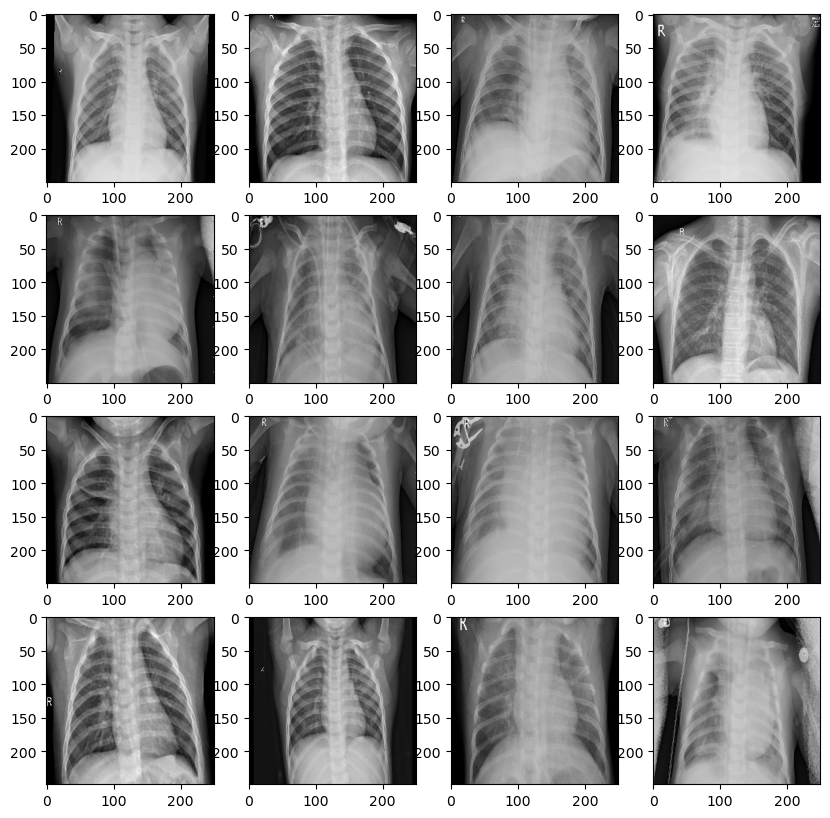

[[0.44653115]
 [0.11507368]
 [0.9562    ]
 [0.9921997 ]
 [0.98398614]
 [0.9984797 ]
 [0.96164536]
 [0.5984563 ]
 [0.10464514]
 [0.9861626 ]
 [0.99548113]
 [0.94996077]
 [0.19509797]
 [0.43928692]
 [0.95449704]
 [0.99521315]]


In [29]:
results = model.predict(images[0])

#     results
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.figure(figsize= (10,10))
for i in range(results.shape[0]):
    plt.subplot(4,4,i+1)
    _=imshow(images[0][i]) ;

plt.show() ;

print(results) 